### Small-World Network (Watts-Strogatz Model)

#### **Algorithm**
1. Create a **regular ring lattice** where each node connects to \( k/2 \) neighbors on both sides.  
2. Iterate over each edge and rewire it with probability \( p \):  
   - Remove the edge.  
   - Select a **new target node** randomly, ensuring no duplicate edges.  
   - If no valid target is found, restore the original edge.  
3. Return the final graph with properties of both **regular and random networks** and plot their metrics.


In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

Computing metrics: 100%|██████████| 20/20 [03:04<00:00,  9.24s/it]


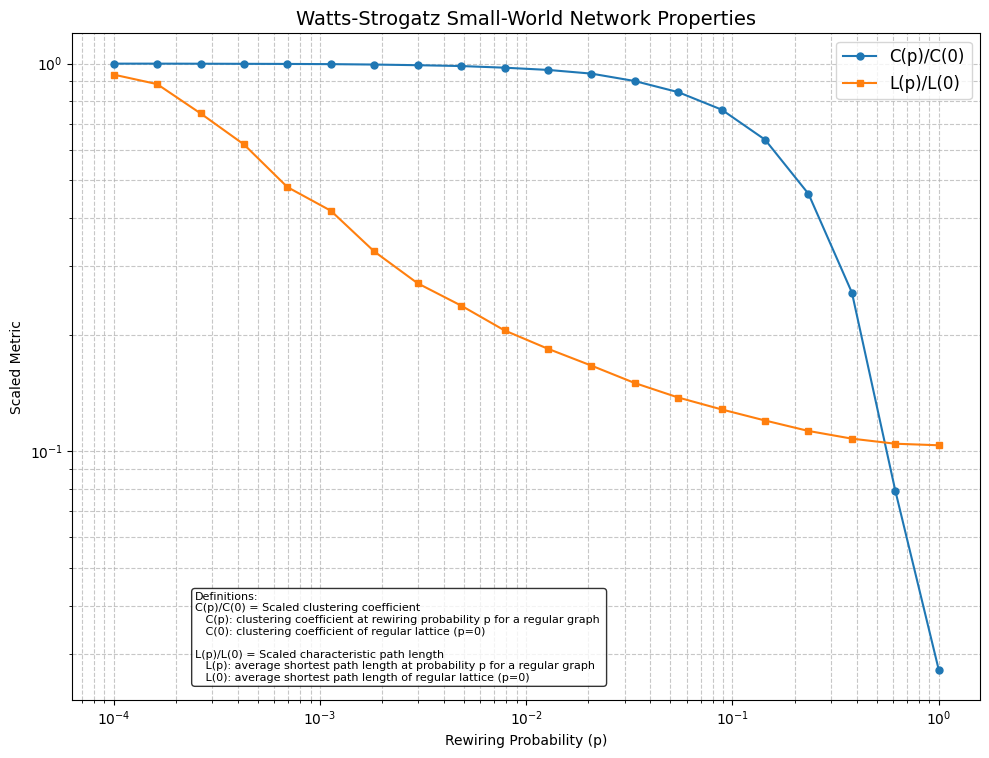

In [25]:
def SWGraph(n, k, p):
    if k % 2 != 0:
        print("k must be even")
        return
    if k >= n:
        print("k must be less than n")
        return
    G = nx.Graph()
    G.add_nodes_from(range(n))
    for i in range(n):
        for j in range(1, k // 2 + 1):
            G.add_edge(i, (i + j) % n)
            G.add_edge(i, (i - j) % n)
    edges = list(G.edges())
    for i, j in edges:
        if np.random.random() < p:
            G.remove_edge(i, j)
            tar = [node for node in range(n) if node != i and not G.has_edge(i, node)]
            if tar:
                new = np.random.choice(tar)
                G.add_edge(i, new)
            else:
                G.add_edge(i, j)
    return G


def solve(n, k, p_values):
    graphG = SWGraph(n, k, 0)
    graphC = nx.average_clustering(graphG)
    graphL = nx.average_shortest_path_length(graphG)
    C_values = []
    L_values = []
    for p in tqdm(p_values, desc="Computing metrics"):
        num = 5
        C = 0
        L = 0
        for _ in range(num):
            G = SWGraph(n, k, p)
            C += nx.average_clustering(G)
            if nx.is_connected(G):
                L += nx.average_shortest_path_length(G)
            else:
                largestCC = max(nx.connected_components(G), key=len)
                subG = G.subgraph(largestCC)
                L += nx.average_shortest_path_length(subG)
        C_avg = C/num
        L_avg = L/num

        C_values.append(C_avg / graphC)
        L_values.append(L_avg / graphL)

    return C_values, L_values


def plot(n, k):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    p_values = [0, 0.1, 1]
    titles = ["Regular (p=0)", "Small-world (p=0.1)", "Random (p=1)"]
    for i, (p, title) in enumerate(zip(p_values, titles)):
        G = SWGraph(n,k,p)
        pos = nx.circular_layout(G)
        nx.draw(G, pos=pos, ax=axes[i], node_size=100, with_labels=False,node_color='red', edge_color='gray', width=0.5)
        axes[i].set_title(title)
    plt.tight_layout()
    plt.savefig('network.png', dpi=300)
    plt.close()


def main():
    n = 1000
    k = 20
    probab = np.logspace(-4, 0, 20)
    C, L = solve(n, k, probab)
    plt.figure(figsize=(10, 8))
    plt.loglog(probab, C, 'o-', label='C(p)/C(0)', markersize=5)
    plt.loglog(probab, L, 's-', label='L(p)/L(0)', markersize=5)
    text = (
        "Definitions:\n"
        "C(p)/C(0) = Scaled clustering coefficient\n"
        "   C(p): clustering coefficient at rewiring probability p for a regular graph \n"
        "   C(0): clustering coefficient of regular lattice (p=0)\n\n"
        "L(p)/L(0) = Scaled characteristic path length\n"
        "   L(p): average shortest path length at probability p for a regular graph\n"
        "   L(0): average shortest path length of regular lattice (p=0)"
    )
    plt.figtext(0.2, 0.1, text, 
            horizontalalignment='left', verticalalignment='bottom', 
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8), 
            fontsize=8)

    plt.xlabel('Rewiring Probability (p)')
    plt.ylabel('Scaled Metric')
    plt.grid(True, which='both', linestyle='--', alpha=0.7)
    plt.legend(loc='upper right', fontsize=12)
    plt.title('Watts-Strogatz Small-World Network Properties', fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig('plot.png', dpi=300)
    plt.show()

    plot(20, 4)

if __name__ == "__main__":
    main()